### Telecom churn prediction:
**Faseela K Karim**

## Introduction

In this Jupyter Notebook we use different machine learning and deep learning techniques to predict customer churn.It uses K-means clustering to identify three groups of customers based on their churn behavior. It plots the elbow curve and silhouette score to determine the optimal number of clusters. Then, it trains and evaluates a neural network model with different regularization techniques and early stopping on each group of customers separately. Finally, we compares the performance of the three models based on their test accuracy and loss.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

Reading Data from Google Drive.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# #uploading the dataset
# #output of onehot encoding used here,no columns deleted based on collinearity
# df_train=pd.read_csv('/content/drive/My Drive/final_capstone/train_data_onehot.csv',index_col=0)
# df_test=pd.read_csv('/content/drive/My Drive/final_capstone/test_data_onehot.csv',index_col=0)

In [ ]:
#uploading the dataset
df_train=pd.read_csv('data/train_data_onehot.csv',index_col=0)
df_test=pd.read_csv('data/test_data_onehot.csv',index_col=0)

In [ ]:
#seperating target variable from test and train data
X_train =df_train.drop('churn',axis=1)
X_test=df_test.drop('churn',axis=1)
y_train=df_train.churn
y_test=df_test.churn

In [ ]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(df_train)
X_test_scaled=scaler.transform(df_test)

### **Trying Different K-means Cluster sizes with inertia**<a name="kmean"></a>

---



Finding the optimal number of clusters involves balancing the reduction in inertia with avoiding overfitting. The elbow point in the inertia plot is typically the best K value. Inertia is a measure of how spread out the clusters are in K-means clustering. It is calculated as the sum of squared distances between each data point and its assigned cluster centroid. A lower inertia value indicates that the data points are closer to their respective cluster centroids, which implies a better fit of the clusters to the data.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:

# Look over a range of K values
k_range = np.arange(1, 20)

# Instantiate an empty list of inertias
inertia_list = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(X_train_scaled)
    
    # Get inertia and add to list
    inertia_list.append(k_means_model.inertia_)  

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

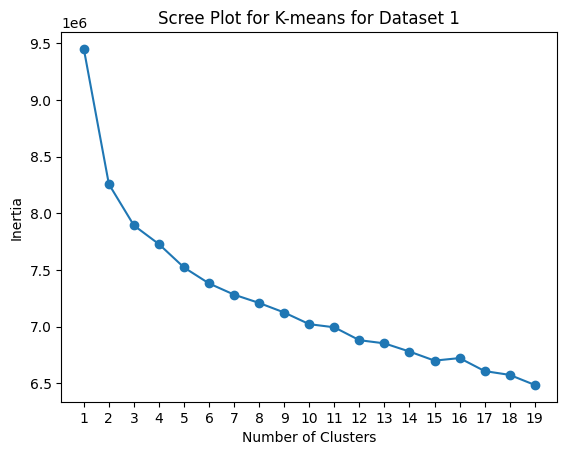

In [ ]:
# Visualize
plt.figure()
plt.plot(k_range, inertia_list, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for K-means for Dataset 1')
plt.xticks(k_range)
plt.show();

We can see the knee point lies around 6. But 3-6 is a good range. considering the practicality as well( as increased clusters will reduce number of rows in each cluster, and affect Machine Learning) we can choose 3 for now. 

### **Trying Different Cluster sizes with silhouette_score**<a name="sil"></a>



---


Another approach to finding the optimal number of clusters is to use the silhouette score, which measures how well each data point fits into its assigned cluster relative to other clusters. The silhouette score ranges from -1 to 1, with higher values indicating better cluster quality. By trying different cluster sizes and calculating their corresponding silhouette scores, we can identify the cluster size that maximizes the overall silhouette score.

In [ ]:

from sklearn.metrics import silhouette_score
# Look over a range of K values
k_range = np.arange(2, 20)

# Instantiate an empty list of silhouette scores
silhouette_scores = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)


    k_means_model.fit(X_train_scaled)
    
    # Get cluster labels and calculate silhouette score
    cluster_labels = k_means_model.predict(X_train_scaled)
    silhouette = silhouette_score(X_train_scaled, cluster_labels)
    
    # Append to list
    silhouette_scores.append(silhouette)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

We are plotting a scree plot for K-means clustering using the Silhouette coefficient as the evaluation metric. The Silhouette coefficient measures how similar an object is to its own cluster compared to other clusters, and ranges from -1 to 1, where higher values indicate better-defined clusters. We are plotting the silhouette coefficient values against the number of clusters in the K-means algorithm for the Old Faithful dataset. This plot helps us determine the optimal number of clusters by identifying the point where the Silhouette coefficient is the highest, indicating the best clustering solution.

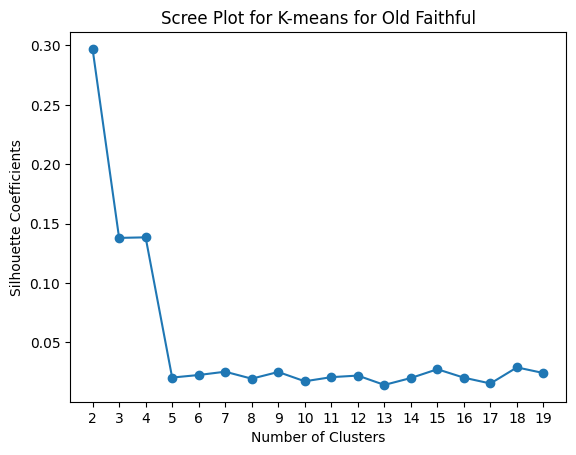

In [ ]:
# plot the silhouette 
plt.figure()
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficients')
plt.title('Scree Plot for K-means for Old Faithful')
plt.xticks(k_range)
plt.show();

We can see the knee point lies around 6. But 3-6 is a good range. considering the practicality as well( as increased clusters will reduce number of rows in each cluster, and affect Machine Learning) we can choose 3 for now. 

### **K-means Clustering( 3 clusters)**<a name="cluster"></a>


Here, K-Means clustering is performed on the customer churn data. The goal of clustering is to group customers based on their shared characteristics, such as demographic, behavioral, and transactional data. The dataset is split into a training set and a test set, and the KMeans algorithm is used to cluster the training data into three clusters. The resulting cluster labels are then assigned to the corresponding data points in both the training and test sets. By grouping similar customers together, the clustering model can help to identify common characteristics among customers who are likely to churn.

In [ ]:
#save the data frames into a new variable
df_test_new=df_test
df_train_new=df_train

In [ ]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_train_new['cluster'] = kmeans.fit_predict(X_train_scaled)


# Print the first few rows of the DataFrame with the cluster labels
df_train_new.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,churn,cluster
0,44.990,366.75,52.49,0.00,0.0,0.000,0.000,0.0,0.0000,31.25,...,0,0,0,0,0,0,0,0,1,0
1,49.990,115.00,59.99,0.00,0.0,0.000,0.000,0.0,0.0000,-3.00,...,0,0,0,0,0,0,0,0,1,0
2,30.260,337.75,39.99,0.00,1.5,0.525,0.525,0.0,0.0000,24.25,...,0,0,0,0,0,1,0,0,0,0
3,49.605,223.25,39.99,0.00,38.0,13.300,13.300,0.0,3.4125,332.75,...,0,0,0,0,0,0,0,0,1,0
4,51.295,647.50,59.99,0.99,0.0,0.000,0.000,0.0,0.0000,-522.50,...,0,1,0,0,0,0,0,0,1,1


This code snippet here assigns cluster labels to the test set using the KMeans model trained on the training set and prints the first few rows of the resulting DataFrame.

In [ ]:

df_test_new['cluster'] = kmeans.predict(X_test_scaled)


# Print the first few rows of the DataFrame with the cluster labels
df_test_new.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,churn,cluster
0,58.1350,401.25,50.00,0.7425,0.00,0.0000,0.0000,0.0,7.3925,87.75,...,0,0,0,0,0,0,0,0,1,1
1,10.5850,37.25,10.00,0.4950,0.00,0.0000,0.0000,0.0,0.0000,65.75,...,0,0,0,0,0,0,0,0,1,0
2,79.2650,535.75,49.99,0.0000,118.00,35.4000,35.4000,0.0,0.0000,-364.75,...,0,1,0,0,0,0,0,0,1,1
3,28.2050,449.00,39.99,0.0000,12.75,4.4625,4.4625,0.0,0.0000,-11.00,...,0,0,0,0,0,0,0,0,0,0
4,54.4375,769.00,59.99,0.0000,4.75,1.4250,1.4250,0.0,0.5850,4.00,...,0,0,0,0,0,0,0,0,1,1


Print the cluster numbers

In [ ]:
df_train_new['cluster'].unique()

array([0, 1, 2], dtype=int32)

In [ ]:
df_test_new['cluster'].unique()

array([1, 0, 2], dtype=int32)

### **Seperating each Clusters into dataframe**

In this section, the clusters obtained from K-Means clustering are separated into individual data frames based on the cluster labels. This allows us to perform separate analyses on each cluster and develop targeted strategies to prevent churn. For example, we can identify the demographic, behavioral, and transactional characteristics of customers in each cluster and compare them to the overall customer population to determine the unique features of each cluster. We can then develop retention strategies specific to each cluster, such as offering personalized incentives, improving customer service, or tailoring marketing campaigns. The separated data frames are used to train and evaluate machine learning models on each cluster individually. This helps to build more accurate models that capture the specific characteristics of each cluster and improve the overall accuracy of customer churn prediction.

Saving different clusters in different dataframes for test and train data

In [ ]:
df_cluster_0=df_train_new[df_train_new['cluster']==0]

In [ ]:
df_cluster_1=df_train_new[df_train_new['cluster']==1]

In [ ]:
df_cluster_2=df_train_new[df_train_new['cluster']==2]

In [ ]:
df_cluster_test_0=df_test_new[df_test_new['cluster']==0]

In [ ]:
df_cluster_test_1=df_test_new[df_test_new['cluster']==1]

In [ ]:
df_cluster_test_2=df_test_new[df_test_new['cluster']==2]

Splitting the cluster specific data frames into target variable and other independent variables

In [ ]:
X_test_0=df_cluster_test_0.drop('churn',axis=1)
y_test_0=df_cluster_test_0.churn

In [ ]:
X_test_1=df_cluster_test_1.drop('churn',axis=1)
y_test_1=df_cluster_test_1.churn

In [ ]:
X_test_2=df_cluster_test_2.drop('churn',axis=1)
y_test_2=df_cluster_test_2.churn

These lines of code below are creating three separate dataframes for the training data, one for each cluster, with the features and target variable separated into X and y respectively.

In [ ]:
X_train_0=df_cluster_0.drop('churn',axis=1)
y_train_0=df_cluster_0.churn

In [ ]:
X_train_1=df_cluster_1.drop('churn',axis=1)
y_train_1=df_cluster_1.churn

In [ ]:
X_train_2=df_cluster_2.drop('churn',axis=1)
y_train_2=df_cluster_2.churn

### **Scaling Cluster dfs**

The below given code is performing feature scaling on the data of three clusters, each of which represents a different customer segment. StandardScaler() from Scikit-learn is used to standardize the features of each cluster. The scaled data is saved in X_train_0_scaled, X_test_0_scaled for cluster 0, X_train_1_scaled, X_test_1_scaled for cluster 1 and X_train_2_scaled, X_test_2_scaled for cluster 2. The shapes of X_train_0, X_train_1 and X_train_2 are printed to check the number of samples and features in each cluster.





In [ ]:
scaler_cluster_0 = StandardScaler()
X_train_0_scaled=scaler_cluster_0.fit_transform(X_train_0)
X_test_0_scaled=scaler_cluster_0.transform(X_test_0)

In [ ]:
scaler_cluster_1 = StandardScaler()
X_train_1_scaled=scaler_cluster_1.fit_transform(X_train_1)
X_test_1_scaled=scaler_cluster_1.transform(X_test_1)

In [ ]:
scaler_cluster_2 = StandardScaler()
X_train_2_scaled=scaler_cluster_2.fit_transform(X_train_2)
X_test_2_scaled=scaler_cluster_2.transform(X_test_2)

Checking the shape of different cluster dataframes

In [ ]:
X_train_0.shape

(49708, 126)

In [ ]:
X_train_1.shape

(21326, 126)

In [ ]:
X_train_2.shape

(3966, 126)

### **Importing Neural Network Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### **Trying Neural networks on different clusters**

In this code snippet, we are trying out different neural network models to predict customer churn. Overall, we are experimenting with different neural network architectures and hyperparameters to identify the best model for predicting customer churn.


First, we create a simple neural network model with four hidden layers and one output layer. We compile the model with binary cross-entropy loss and accuracy metrics, and train it on the preprocessed training data for 10 epochs. We then evaluate the model on the test set and print the test loss and test accuracy.

In [ ]:
#Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(126,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_1_scaled, y_train_1, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_1_scaled, y_test_1)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Epoch 1/10
600/600 [==============================] - 5s 5ms/step - loss: 0.6891 - accuracy: 0.5471 - val_loss: 0.6745 - val_accuracy: 0.5692
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6733 - accuracy: 0.5883 - val_loss: 0.6726 - val_accuracy: 0.5818
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6655 - accuracy: 0.5968 - val_loss: 0.6715 - val_accuracy: 0.5738
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6607 - accuracy: 0.6040 - val_loss: 0.6667 - val_accuracy: 0.5968
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6550 - accuracy: 0.6133 - val_loss: 0.6674 - val_accuracy: 0.5921
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6484 - accuracy: 0.6177 - val_loss: 0.6686 - val_accuracy: 0.5921
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.6411 - accuracy: 0.6290 - val_loss: 0.6707 - val_accuracy: 0.5902
Epoch 

Now we can try neural network model by adding cluster labels as an additional feature in the dataframe

In [ ]:
df_cluster_train=df_train_new.drop('churn',axis=1)
df_cluster_test=df_test_new.drop('churn',axis=1)
scaler_cluster = StandardScaler()
cluster_train_scaled=scaler_cluster.fit_transform(df_cluster_train)
cluster_test_scaled=scaler_cluster.transform(df_cluster_test)

Next, we preprocess the training and test data again, this time adding the cluster label as a feature. We then create another neural network model with the same architecture as before, but with added regularization to prevent overfitting. We compile the model with binary cross-entropy loss and accuracy metrics, and train it on the preprocessed training data for 200 epochs with early stopping to prevent overfitting. We evaluate the model on the test set and print the test loss and test accuracy.

In [ ]:
#TRYING WITH CLUSTER LABEL AS A FEATURE
# Try some methods such as early stopping and different regularizers. 
#Create a simple neural network model with regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(126,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

# Train the model with early stopping
history = model.fit(cluster_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(cluster_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')





Epoch 1/200
2110/2110 [==============================] - 12s 4ms/step - loss: 0.8041 - accuracy: 0.5715 - val_loss: 0.6866 - val_accuracy: 0.5836
Epoch 2/200
2110/2110 [==============================] - 8s 4ms/step - loss: 0.6841 - accuracy: 0.5871 - val_loss: 0.6816 - val_accuracy: 0.5877
Epoch 3/200
2110/2110 [==============================] - 7s 4ms/step - loss: 0.6809 - accuracy: 0.5909 - val_loss: 0.6786 - val_accuracy: 0.5872
Epoch 4/200
2110/2110 [==============================] - 8s 4ms/step - loss: 0.6794 - accuracy: 0.5942 - val_loss: 0.6796 - val_accuracy: 0.5895
Epoch 5/200
2110/2110 [==============================] - 8s 4ms/step - loss: 0.6783 - accuracy: 0.5929 - val_loss: 0.6762 - val_accuracy: 0.5968
Epoch 6/200
2110/2110 [==============================] - 8s 4ms/step - loss: 0.6775 - accuracy: 0.5952 - val_loss: 0.6768 - val_accuracy: 0.5905
Epoch 7/200
2110/2110 [==============================] - 8s 4ms/step - loss: 0.6766 - accuracy: 0.5977 - val_loss: 0.6753 - val_a

Try some methods such as early stopping and different regularizers.

In [ ]:
# Try some methods such as early stopping and different regularizers. 
#Create a simple neural network model with regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(126,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

# Train the model with early stopping
history = model.fit(X_train_0_scaled, y_train_0, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_0_scaled, y_test_0)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')



Epoch 1/200
1670/1670 [==============================] - 10s 5ms/step - loss: 0.8176 - accuracy: 0.5815 - val_loss: 0.6900 - val_accuracy: 0.5911
Epoch 2/200
1670/1670 [==============================] - 7s 4ms/step - loss: 0.6817 - accuracy: 0.5981 - val_loss: 0.6769 - val_accuracy: 0.6004
Epoch 3/200
1670/1670 [==============================] - 8s 5ms/step - loss: 0.6766 - accuracy: 0.5995 - val_loss: 0.6758 - val_accuracy: 0.6068
Epoch 4/200
1670/1670 [==============================] - 9s 5ms/step - loss: 0.6747 - accuracy: 0.6042 - val_loss: 0.6704 - val_accuracy: 0.6051
Epoch 5/200
1670/1670 [==============================] - 7s 4ms/step - loss: 0.6730 - accuracy: 0.6051 - val_loss: 0.6715 - val_accuracy: 0.6044
Epoch 6/200
1670/1670 [==============================] - 8s 5ms/step - loss: 0.6717 - accuracy: 0.6061 - val_loss: 0.6716 - val_accuracy: 0.6026
Epoch 7/200
1670/1670 [==============================] - 7s 4ms/step - loss: 0.6707 - accuracy: 0.6043 - val_loss: 0.6719 - val_a

## Function for Neural network Training.

This code defines a function for training a neural network on the customer churn dataset. The function takes in the preprocessed training and test data sets as input, creates a sequential neural network model with four hidden layers and one output layer, compiles the model with binary cross-entropy loss and accuracy metrics, trains the model on the training data for 15 epochs, and evaluates the model on the test set. The trained model, test loss, and test accuracy are returned as output from the function. This function can be used to train and evaluate multiple neural network models with different configurations of hidden layers and other hyperparameters to identify the best model for predicting customer churn.

In [ ]:
import tensorflow as tf

def train_neural_network(X_train_scaled, y_train, X_test_scaled, y_test):
    # Create a simple neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=15, batch_size=50, validation_split=0.1)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

    return model, test_loss, test_accuracy


## All three clusters and their neural network models

In this code, we have trained and evaluated three neural network models on the preprocessed customer churn dataset. The dataset was split into three clusters using k-means clustering, and each cluster was separately used to train and test the neural network models. The neural network architecture consisted of four hidden layers and one output layer, with ReLU activation for the hidden layers and sigmoid activation for the output layer. The models were trained using binary cross-entropy loss and accuracy metrics, and different hyperparameters were tried to optimize the model performance.


Epoch 1/15
895/895 [==============================] - 5s 5ms/step - loss: 0.6802 - accuracy: 0.5702 - val_loss: 0.6693 - val_accuracy: 0.5936
Epoch 2/15
895/895 [==============================] - 6s 7ms/step - loss: 0.6641 - accuracy: 0.6012 - val_loss: 0.6653 - val_accuracy: 0.5938
Epoch 3/15
895/895 [==============================] - 4s 5ms/step - loss: 0.6580 - accuracy: 0.6122 - val_loss: 0.6647 - val_accuracy: 0.5971
Epoch 4/15
895/895 [==============================] - 4s 5ms/step - loss: 0.6536 - accuracy: 0.6166 - val_loss: 0.6622 - val_accuracy: 0.5961
Epoch 5/15
895/895 [==============================] - 6s 7ms/step - loss: 0.6489 - accuracy: 0.6212 - val_loss: 0.6617 - val_accuracy: 0.6023
Epoch 6/15
895/895 [==============================] - 4s 5ms/step - loss: 0.6446 - accuracy: 0.6244 - val_loss: 0.6600 - val_accuracy: 0.6029
Epoch 7/15
895/895 [==============================] - 4s 5ms/step - loss: 0.6410 - accuracy: 0.6288 - val_loss: 0.6587 - val_accuracy: 0.6055
Epoch 

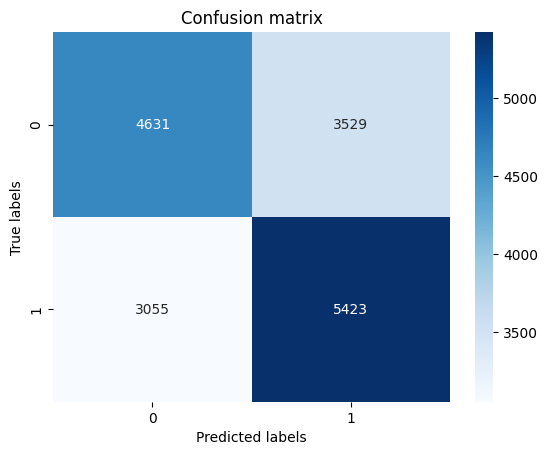

Test Loss: 0.663711428642273, Test Accuracy: 0.6042793393135071
              precision    recall  f1-score   support

           0       0.60      0.57      0.58      8160
           1       0.61      0.64      0.62      8478

    accuracy                           0.60     16638
   macro avg       0.60      0.60      0.60     16638
weighted avg       0.60      0.60      0.60     16638



In [ ]:
from sklearn.metrics import confusion_matrix

model, test_loss, test_accuracy = train_neural_network(X_train_0_scaled, y_train_0, X_test_0_scaled, y_test_0)
# Make predictions on the test set
y_pred = model.predict(X_test_0_scaled)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test_0, y_pred_classes)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Calculate the classification report
report = classification_report(y_test_0, y_pred_classes)

# Print the classification report
print(report)



Epoch 1/15
384/384 [==============================] - 3s 5ms/step - loss: 0.6893 - accuracy: 0.5408 - val_loss: 0.6736 - val_accuracy: 0.5659
Epoch 2/15
384/384 [==============================] - 2s 5ms/step - loss: 0.6745 - accuracy: 0.5847 - val_loss: 0.6704 - val_accuracy: 0.5907
Epoch 3/15
384/384 [==============================] - 2s 5ms/step - loss: 0.6654 - accuracy: 0.5984 - val_loss: 0.6680 - val_accuracy: 0.5842
Epoch 4/15
384/384 [==============================] - 3s 7ms/step - loss: 0.6591 - accuracy: 0.6050 - val_loss: 0.6666 - val_accuracy: 0.5959
Epoch 5/15
384/384 [==============================] - 3s 8ms/step - loss: 0.6535 - accuracy: 0.6139 - val_loss: 0.6659 - val_accuracy: 0.6010
Epoch 6/15
384/384 [==============================] - 2s 5ms/step - loss: 0.6489 - accuracy: 0.6230 - val_loss: 0.6648 - val_accuracy: 0.5902
Epoch 7/15
384/384 [==============================] - 2s 5ms/step - loss: 0.6435 - accuracy: 0.6273 - val_loss: 0.6684 - val_accuracy: 0.6015
Epoch 

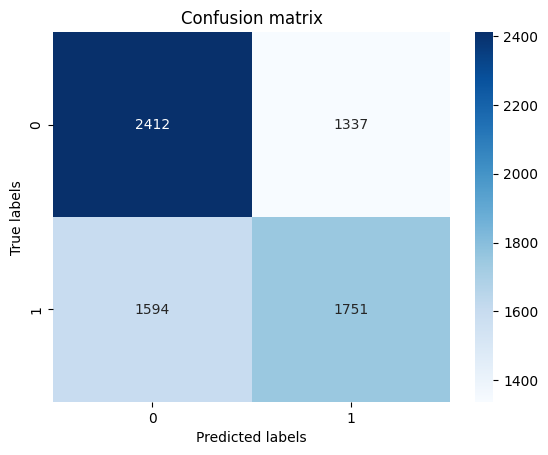

Test Loss: 0.6852957606315613, Test Accuracy: 0.5868339538574219
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      3749
           1       0.57      0.52      0.54      3345

    accuracy                           0.59      7094
   macro avg       0.58      0.58      0.58      7094
weighted avg       0.59      0.59      0.59      7094



In [ ]:
from sklearn.metrics import confusion_matrix
model, test_loss, test_accuracy = train_neural_network(X_train_1_scaled, y_train_1, X_test_1_scaled, y_test_1)
# Make predictions on the test set
y_pred = model.predict(X_test_1_scaled)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test_1, y_pred_classes)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Calculate the classification report
report = classification_report(y_test_1, y_pred_classes)

# Print the classification report
print(report)

Epoch 1/15
72/72 [==============================] - 3s 18ms/step - loss: 0.6961 - accuracy: 0.5551 - val_loss: 0.6900 - val_accuracy: 0.5416
Epoch 2/15
72/72 [==============================] - 1s 11ms/step - loss: 0.6795 - accuracy: 0.5817 - val_loss: 0.6838 - val_accuracy: 0.5718
Epoch 3/15
72/72 [==============================] - 1s 11ms/step - loss: 0.6604 - accuracy: 0.6016 - val_loss: 0.6726 - val_accuracy: 0.5970
Epoch 4/15
72/72 [==============================] - 1s 9ms/step - loss: 0.6512 - accuracy: 0.6153 - val_loss: 0.6608 - val_accuracy: 0.6196
Epoch 5/15
72/72 [==============================] - 0s 5ms/step - loss: 0.6406 - accuracy: 0.6388 - val_loss: 0.6664 - val_accuracy: 0.5919
Epoch 6/15
72/72 [==============================] - 0s 5ms/step - loss: 0.6227 - accuracy: 0.6492 - val_loss: 0.6674 - val_accuracy: 0.6121
Epoch 7/15
72/72 [==============================] - 0s 5ms/step - loss: 0.6102 - accuracy: 0.6655 - val_loss: 0.6687 - val_accuracy: 0.5945
Epoch 8/15
72/72 

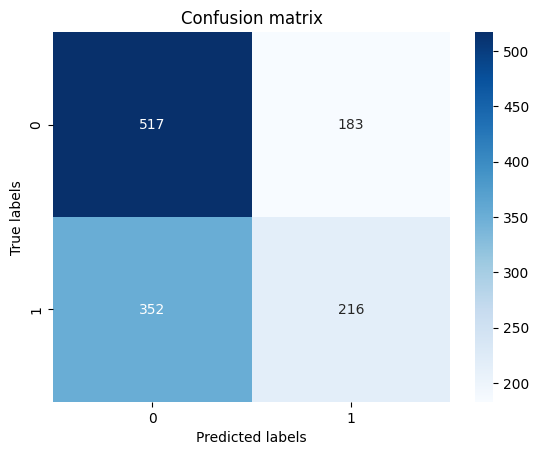

Test Loss: 0.8085553646087646, Test Accuracy: 0.5780757069587708
              precision    recall  f1-score   support

           0       0.59      0.74      0.66       700
           1       0.54      0.38      0.45       568

    accuracy                           0.58      1268
   macro avg       0.57      0.56      0.55      1268
weighted avg       0.57      0.58      0.56      1268



In [ ]:



model, test_loss, test_accuracy = train_neural_network(X_train_2_scaled, y_train_2, X_test_2_scaled, y_test_2)
# Make predictions on the test set
y_pred = model.predict(X_test_2_scaled)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test_2, y_pred_classes)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Calculate the classification report
report = classification_report(y_test_2, y_pred_classes)

# Print the classification report
print(report)


## Conclusion
We started by exploring the dataset and preprocessing the data by handling missing values, encoding categorical features, and scaling numerical features. We then used various machine learning algorithms such as logistic regression, decision tree, random forest, and XGBoost to train and evaluate models for predicting customer churn. We also used K-means clustering to identify three distinct groups of customers based on their characteristics.

We then used neural networks to build and train models for predicting customer churn. We tried different configurations of hidden layers, regularization techniques, and early stopping to improve the performance of the models. We also trained separate models on each of the three clusters identified earlier to see if clustering improves the performance of the models.

For cluster 1,for exampe,  the neural network model with 4 hidden layers and 15 epochs achieved a test accuracy of 60.43, which is slightly lower than the  random forest models. Regularization with L2 penalty was used to prevent overfitting. Overall, the neural network model did not outperform the other models in this cluster. However, it is still a good approach to consider when dealing with complex datasets where other models may not perform well.

**Reasons**


There can be several reasons for the low accuracy of the model in this context. Firstly, the dataset may not have enough data or may not be diverse enough to capture the complexity of the problem. This can lead to overfitting or underfitting of the model, resulting in poor generalization performance. Secondly, the choice of hyperparameters such as the learning rate, batch size, and number of epochs can significantly impact the accuracy of the model. Poor choices of hyperparameters can lead to slow convergence or even divergence, making it difficult to achieve high accuracy.

Thirdly, feature selection and engineering can have a significant impact on the performance of the model. The selected features may not capture the relevant information needed to predict churn accurately. Feature engineering, on the other hand, can help extract more meaningful features from the raw data and improve the accuracy of the model. Fourthly, the choice of algorithm or model architecture can also impact the performance of the model. Different models have different strengths and weaknesses, and choosing the right model for the problem at hand can make a significant difference in the accuracy of the predictions.

Lastly, it is possible that the problem itself is inherently difficult to solve, and the best possible accuracy that can be achieved with the current dataset and methods is lower than expected. In such cases, it may be necessary to collect more data or explore more advanced methods to improve the accuracy. Overall, achieving high accuracy in predictive modeling is a challenging task that requires careful consideration of several factors, including data quality, feature engineering, model selection, and hyperparameter tuning.